# Decision Trees: A Beginner's Guide to Classification and Regression

## Welcome to Decision Trees! 🌳

This tutorial will teach you everything you need to know about decision trees in a beginner-friendly way.

**What you'll learn:**
- 🎯 **What are decision trees?** - Easy-to-understand explanations
- 📊 **Classification** - Predicting categories (Play Tennis example)
- 🏠 **Regression** - Predicting numbers (House Prices example)
- ⚙️ **Model optimization** - Making your trees work better
- 📈 **Evaluation** - How to measure success

**Why learn decision trees?**
- Easy to understand and explain
- Work with any type of data
- Show you which features matter most
- Foundation for advanced methods like Random Forests

## 1. Setup: Import Libraries and Load Data

Let's start by getting everything we need ready.

In [4]:
# Import the libraries we'll need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

# Load our datasets
tennis_data = pd.read_csv('tennis.csv')
ames_data = pd.read_csv('ames.csv')

print("📊 Tennis Dataset (Classification):")
print(tennis_data.head())
print(f"\n🏠 Ames Dataset (Regression) - shape: {ames_data.shape}")
print(ames_data[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].head())

📊 Tennis Dataset (Classification):
    outlook  temp humidity  windy play
0     sunny   hot     high  False   no
1     sunny   hot     high   True   no
2  overcast   hot     high  False  yes
3     rainy  mild     high  False  yes
4     rainy  cool   normal  False  yes

🏠 Ames Dataset (Regression) - shape: (1460, 81)
   LotArea  1stFlrSF  GrLivArea  SalePrice
0     8450       856       1710     208500
1     9600      1262       1262     181500
2    11250       920       1786     223500
3     9550       961       1717     140000
4    14260      1145       2198     250000


## 2. What is a Decision Tree? 🌳

Think of a decision tree like a flowchart that asks yes/no questions to make decisions.

**Example: Should I play tennis today?**
```
Is it sunny?
├── Yes → Is humidity low? 
│   ├── Yes → Play Tennis! ✅
│   └── No → Don't play ❌
└── No → Is it raining?
    ├── Yes → Don't play ❌ 
    └── No → Play Tennis! ✅
```

**Key parts:**
- **Root**: Starting point (top of tree)
- **Nodes**: Decision points (questions)
- **Branches**: Paths based on answers
- **Leaves**: Final decisions (bottom of tree)

## 3. Understanding Entropy and Information Gain

**Entropy** measures how "mixed up" or uncertain our data is.

**Think of it like a coin:**
- All heads = Low entropy (predictable)
- 50% heads, 50% tails = High entropy (uncertain)

**Information Gain** measures how much a question reduces uncertainty.

🎾 Tennis Dataset Entropy: 0.940

📊 What this means:
• Entropy of 0.940 means high uncertainty (the classes are quite mixed)
• 0 = perfectly predictable, 1 = completely uncertain

🏆 Distribution: {'yes': 9, 'no': 5}


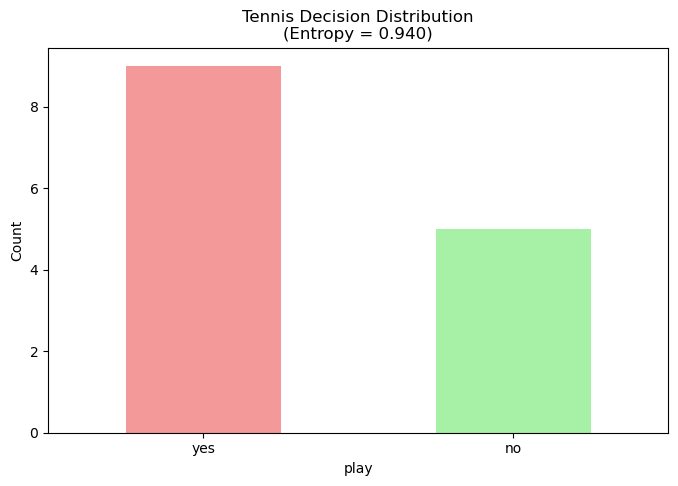

In [5]:
# Let's calculate entropy for our tennis data
def calculate_entropy(data_column):
    """Calculate entropy of a column"""
    values = data_column.value_counts()
    probabilities = values / len(data_column)
    entropy = -sum(p * np.log2(p) for p in probabilities if p > 0)
    return entropy

# Calculate entropy for tennis playing decision
tennis_entropy = calculate_entropy(tennis_data['play'])
print(f"🎾 Tennis Dataset Entropy: {tennis_entropy:.3f}")
print(f"\n📊 What this means:")
print(f"• Entropy of {tennis_entropy:.3f} means high uncertainty (the classes are quite mixed)")
print(f"• 0 = perfectly predictable, 1 = completely uncertain")

# Show the distribution
play_counts = tennis_data['play'].value_counts()
print(f"\n🏆 Distribution: {play_counts.to_dict()}")

# Visualize entropy
plt.figure(figsize=(8, 5))
play_counts.plot(kind='bar', color=['lightcoral', 'lightgreen'], alpha=0.8)
plt.title(f'Tennis Decision Distribution\n(Entropy = {tennis_entropy:.3f})')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### 🎯 What we learned:
- **Entropy measures uncertainty** in our data
- **Higher entropy = more mixed up** data
- **Decision trees try to reduce entropy** by finding good splits
- Our tennis data has high uncertainty (the classes are quite mixed and not perfectly predictable)

## 4. Classification Example: Tennis Decision Tree

Let's build our first decision tree to predict whether to play tennis based on weather!

In [6]:
# Prepare the data for machine learning
# Separate features (weather conditions) from target (play tennis?)
X_tennis = tennis_data[['outlook', 'temp', 'humidity', 'windy']]
y_tennis = tennis_data['play']

print("🎯 Features (what we use to predict):")
print(X_tennis.head())
print("\n🏆 Target (what we want to predict):")
print(y_tennis.head())

🎯 Features (what we use to predict):
    outlook  temp humidity  windy
0     sunny   hot     high  False
1     sunny   hot     high   True
2  overcast   hot     high  False
3     rainy  mild     high  False
4     rainy  cool   normal  False

🏆 Target (what we want to predict):
0     no
1     no
2    yes
3    yes
4    yes
Name: play, dtype: object


In [7]:
# Convert text to numbers (One-Hot Encoding)
# Machine learning algorithms need numbers, not text
encoder = OneHotEncoder(sparse_output=False, drop='first') 
X_tennis_encoded = encoder.fit_transform(X_tennis)
feature_names = encoder.get_feature_names_out(X_tennis.columns)

print("🔄 After encoding to numbers:")
print(f"Original features: {list(X_tennis.columns)}")
print(f"Encoded features: {list(feature_names)}")
print(f"Shape changed from {X_tennis.shape} to {X_tennis_encoded.shape}")

🔄 After encoding to numbers:
Original features: ['outlook', 'temp', 'humidity', 'windy']
Encoded features: ['outlook_rainy', 'outlook_sunny', 'temp_hot', 'temp_mild', 'humidity_normal', 'windy_True']
Shape changed from (14, 4) to (14, 6)


### 🔄 One-Hot Encoding Explained

**What this code does:**
- **Creates encoder**: `OneHotEncoder()` converts categorical text into binary columns (0s and 1s)
- **Transforms data**: `fit_transform()` applies the encoding to our tennis features
- **Gets new names**: `get_feature_names_out()` shows what the new encoded columns are called

**Key parameters explained:**
- **`sparse_output=False`**: Returns a regular NumPy array instead of a sparse matrix
  - **Sparse matrix**: Saves memory by only storing non-zero values (efficient for mostly zeros)
  - **Dense array**: Stores all values including zeros (easier to work with for small datasets)
  - Since our tennis dataset is small, we use `False` for simplicity
- **`drop='first'`**: Prevents redundancy by dropping one category per feature. drop_first drops the first category using alphabetical order

**Why we need this:**
- Machine learning models can only work with numbers, not text like "sunny" or "rainy"
- One-hot encoding turns each category into its own binary column (present=1, absent=0)
- For small datasets like ours, dense arrays are easier to inspect and debug

In [8]:
# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_tennis_encoded, y_tennis, test_size=0.3, random_state=42
)

# Create and train the decision tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

print(f"🌳 Decision tree trained!")
print(f"   • Tree depth: {clf.get_depth()}")
print(f"   • Number of leaves: {clf.get_n_leaves()}")

🌳 Decision tree trained!
   • Tree depth: 3
   • Number of leaves: 4


### 🌳 Understanding Tree Structure

**Tree Depth** = How many levels of questions the tree asks
- Depth 1: Just one question (very simple)
- Depth 3: Up to 3 questions in a row (moderate complexity)
- Deeper trees can capture more complex patterns but risk overfitting

**Number of Leaves** = How many final answers (predictions) the tree has
- Each leaf represents a different outcome
- More leaves = more specific predictions
- Fewer leaves = more general predictions

**Example with our tree:**
```
Question 1: Is outlook_sunny ≤ 0.5?
├── Yes → Question 2: Is humidity_high ≤ 0.5?
│   ├── Yes → Leaf 1: "Play Tennis"
│   └── No → Leaf 2: "Don't Play"
└── No → Question 3: Is windy_true ≤ 0.5?
    ├── Yes → Leaf 3: "Play Tennis"  
    └── No → Leaf 4: "Don't Play"
```

**Our tree:** Depth 3 (3 levels of questions), 4 leaves (4 possible outcomes)

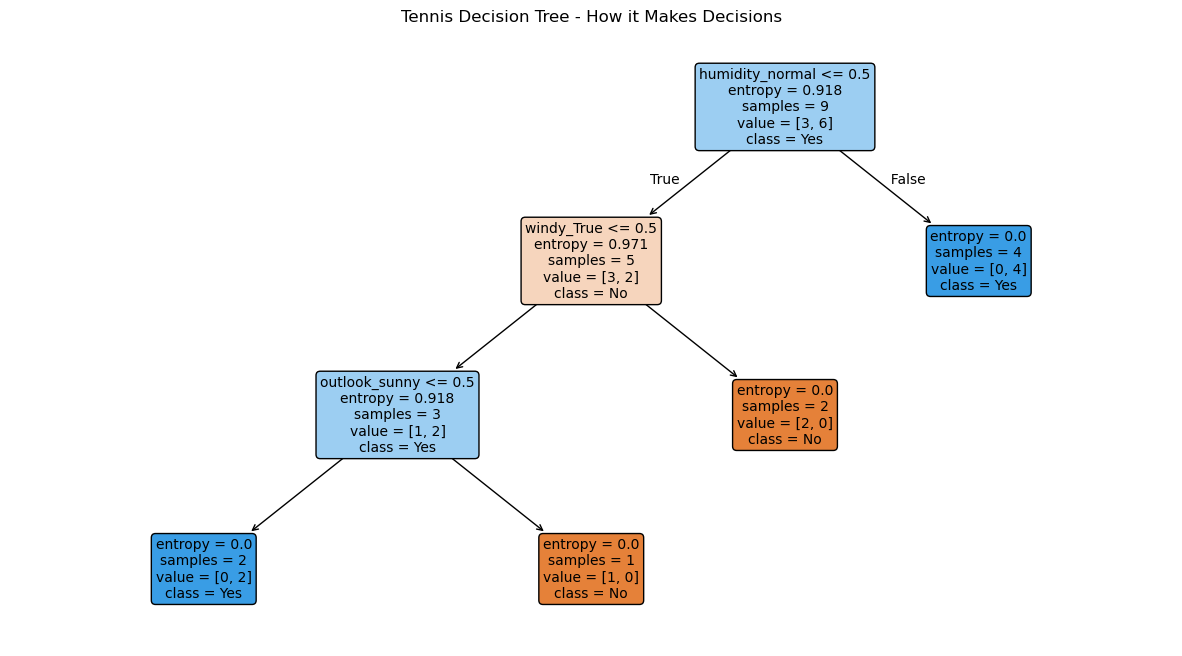

In [9]:
# Visualize the decision tree
plt.figure(figsize=(15, 8))
plot_tree(clf, 
          feature_names=feature_names,
          class_names=['No', 'Yes'],
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title('Tennis Decision Tree - How it Makes Decisions')
plt.show()

### 🔍 Step-by-Step Decision Tree Analysis

Let's trace through exactly how this tree makes decisions:

#### **🌱 Root Node (Top): "humidity_normal ≤ 0.5"**
- **Question**: "Is humidity normal?" (Remember: ≤ 0.5 means "Is this feature absent?")
- **What this means**: Since `humidity_normal = 1` when humidity is normal, and `humidity_normal = 0` when humidity is high
  - **Left branch (Yes)**: Humidity is HIGH (humidity_normal = 0, which is ≤ 0.5)
  - **Right branch (No)**: Humidity is NORMAL (humidity_normal = 1, which is > 0.5)
- **Data split**: 9 samples total → 5 go left (high humidity), 4 go right (normal humidity)
- **Current prediction**: "Yes" (majority vote: 6 yes vs 3 no)

#### **🍃 Left Branch: "windy_True ≤ 0.5" (High Humidity Path)**
- **Question**: "Is it windy?"
- **What this means**: Since `windy_True = 1` when windy, and `windy_True = 0` when not windy
  - **Left branch (Yes)**: NOT windy (windy_True = 0, which is ≤ 0.5)
  - **Right branch (No)**: IS windy (windy_True = 1, which is > 0.5)
- **Data split**: 5 samples → 3 go left (not windy), 2 go right (windy)

#### **🍃 Right Branch: Pure Node (Normal Humidity Path)**
- **No more questions needed!**
- **Entropy = 0.0**: Perfect purity (all samples agree)
- **Decision**: "Yes, play tennis" (4 out of 4 samples say yes)
- **Rule**: **When humidity is normal → Always play tennis**

#### **🍂 Final Leaves (Bottom Row)**

**Leaf 1 (Bottom Left)**: "outlook_sunny ≤ 0.5"
- **Path**: High humidity → Not windy
- **Question**: "Is it sunny?"
- **Left (Yes)**: NOT sunny (outlook_sunny = 0) → **Play Tennis** (2 yes, 0 no)
- **Right (No)**: IS sunny (outlook_sunny = 1) → **Don't Play** (1 no, 0 yes)

**Leaf 2 (Bottom Right of windy branch)**:
- **Path**: High humidity → Windy
- **Decision**: **Don't Play Tennis** (2 no, 0 yes)
- **Rule**: **When humid and windy → Don't play**

#### **🎯 Complete Decision Rules**

1. **If humidity is NORMAL** → **Play Tennis** ✅
2. **If humidity is HIGH and it's WINDY** → **Don't Play** ❌
3. **If humidity is HIGH, NOT windy, and NOT sunny** → **Play Tennis** ✅
4. **If humidity is HIGH, NOT windy, and SUNNY** → **Don't Play** ❌

#### **🔧 Understanding the ≤ 0.5 Notation**

The tree uses **binary encoding** where:
- `humidity_normal ≤ 0.5` means "Is humidity_normal = 0?" (i.e., "Is humidity HIGH?")
- `windy_True ≤ 0.5` means "Is windy_True = 0?" (i.e., "Is it NOT windy?")
- `outlook_sunny ≤ 0.5` means "Is outlook_sunny = 0?" (i.e., "Is it NOT sunny?")

**Remember**: One-hot encoding creates binary columns where 1 = "feature present", 0 = "feature absent"

### 📖 Reading the Decision Tree Visualization

**What you see in each box (node):**

🔍 **Questions (e.g., "outlook_overcast ≤ 0.5")**
- The tree asks yes/no questions about features
- ≤ 0.5 means "Is this feature absent?" (0) or "present?" (1)
- Left branch = Yes (condition is true)
- Right branch = No (condition is false)

📊 **Entropy value (e.g., "entropy = 0.811")**
- Shows how "mixed up" the data is at this point
- 0.0 = perfectly pure (all same class)
- 1.0 = maximum uncertainty (50/50 split)
- Lower entropy = better separation

📈 **Samples (e.g., "samples = 10")**
- Number of data points that reach this node
- Starts with all data at root, gets smaller as we go down

🎯 **Value (e.g., "value = [4, 6]")**
- Shows count of each class: [No, Yes]
- Example: [4, 6] means 4 "No" and 6 "Yes" votes
- Prediction goes with the majority

🏆 **Class (e.g., "class = yes")**
- The final prediction for this node
- Based on which class has more samples
- Only appears in leaf nodes (final decisions)

**🎨 Colors indicate the winning class:**
- **Orange/Red** = "No" (don't play tennis)
- **Blue/Green** = "Yes" (play tennis)
- **Darker colors** = more confident predictions

In [10]:
# Test our model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"🎯 Model Performance:")
print(f"   • Accuracy: {accuracy:.1%}")
print(f"   • This means we got {accuracy:.1%} of predictions right!")

# Show some example predictions
print(f"\n🔍 Example Predictions:")
for i in range(min(3, len(X_test))):
    actual = y_test.iloc[i]
    predicted = y_pred[i]
    result = "✅ Correct" if actual == predicted else "❌ Wrong"
    print(f"   Sample {i+1}: Actual={actual}, Predicted={predicted} {result}")

🎯 Model Performance:
   • Accuracy: 60.0%
   • This means we got 60.0% of predictions right!

🔍 Example Predictions:
   Sample 1: Actual=yes, Predicted=yes ✅ Correct
   Sample 2: Actual=yes, Predicted=no ❌ Wrong
   Sample 3: Actual=no, Predicted=no ✅ Correct


### 🎯 What we accomplished:
- **Built a decision tree** that learns from weather data
- **Made predictions** about playing tennis
- **Visualized the rules** the tree learned
- **Measured accuracy** to see how well it works

The tree shows exactly what questions it asks and how it makes decisions!

## 5. Regression Example: Predicting House Prices 🏠

Now let's use decision trees to predict continuous numbers (house prices) instead of categories.

In [11]:
# Select key features for house price prediction
features = ['LotArea', '1stFlrSF', 'GrLivArea']  # Lot size, floor area, living area
X_houses = ames_data[features]
y_houses = ames_data['SalePrice']

print("🏠 House Features:")
print(X_houses.describe())
print(f"\n💰 House Prices:")
print(f"   • Average: ${y_houses.mean():,.0f}")
print(f"   • Range: ${y_houses.min():,.0f} - ${y_houses.max():,.0f}")

🏠 House Features:
             LotArea     1stFlrSF    GrLivArea
count    1460.000000  1460.000000  1460.000000
mean    10516.828082  1162.626712  1515.463699
std      9981.264932   386.587738   525.480383
min      1300.000000   334.000000   334.000000
25%      7553.500000   882.000000  1129.500000
50%      9478.500000  1087.000000  1464.000000
75%     11601.500000  1391.250000  1776.750000
max    215245.000000  4692.000000  5642.000000

💰 House Prices:
   • Average: $180,921
   • Range: $34,900 - $755,000


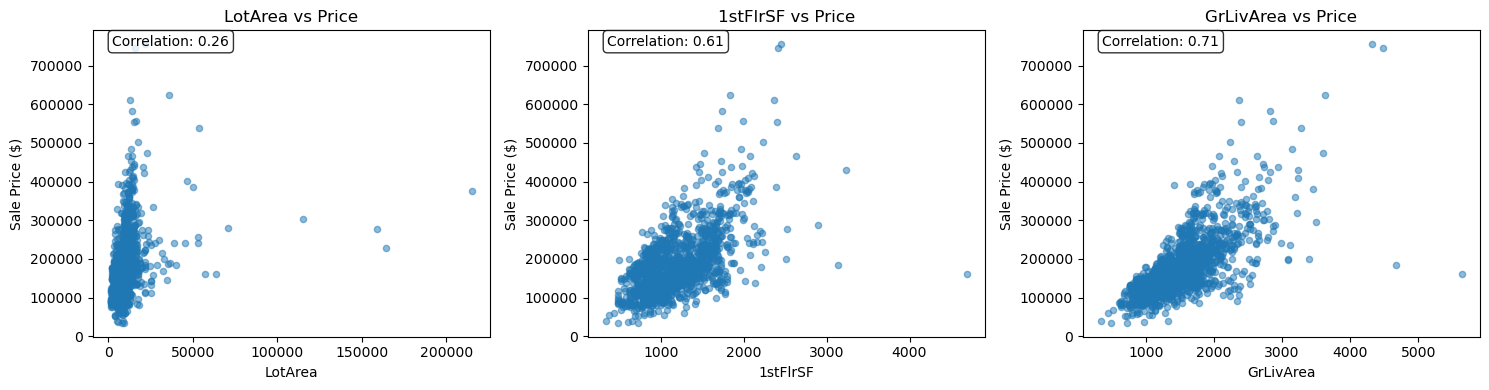

In [12]:
# Visualize relationships between features and price
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, feature in enumerate(features):
    axes[i].scatter(X_houses[feature], y_houses, alpha=0.5, s=20)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Sale Price ($)')
    axes[i].set_title(f'{feature} vs Price')
    
    # Calculate correlation
    correlation = np.corrcoef(X_houses[feature], y_houses)[0, 1]
    axes[i].text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
                transform=axes[i].transAxes, 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [13]:
# Train a regression tree
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_houses, y_houses, test_size=0.2, random_state=42
)

# Create and train regression tree
reg_tree = DecisionTreeRegressor(max_depth=5, min_samples_split=20, random_state=42)
reg_tree.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = reg_tree.predict(X_test_reg)

print(f"🌳 Regression Tree trained!")
print(f"   • Tree depth: {reg_tree.get_depth()}")
print(f"   • Number of leaves: {reg_tree.get_n_leaves()}")

🌳 Regression Tree trained!
   • Tree depth: 5
   • Number of leaves: 26


### 🌳 Understanding the Regression Tree Code

**What this code does:**

1. **`train_test_split()`**: Splits our house data into training (80%) and testing (20%) sets
   - **Training set**: Used to teach the tree the patterns
   - **Testing set**: Used to evaluate how well it performs on unseen data

2. **`DecisionTreeRegressor()`**: Creates a regression tree with specific controls:
   - **`max_depth=5`**: Limits tree to 5 levels deep (prevents overfitting)
   - **`min_samples_split=20`**: Explained below ⬇️
   - **`random_state=42`**: Ensures reproducible results

3. **`fit()`**: Trains the tree on the training data
4. **`predict()`**: Makes price predictions on the test set

#### 🔧 What is `min_samples_split=20`?

**`min_samples_split`** controls when the tree stops asking more questions:

- **What it means**: "Don't split a node unless it has at least 20 samples"
- **Why it matters**: Prevents the tree from making decisions based on very few examples

**Example:**
```
Node with 25 samples → ✅ Can split (25 ≥ 20)
Node with 15 samples → ❌ Becomes a leaf (15 < 20)
```

**Benefits:**
- **Prevents overfitting**: Stops the tree from memorizing individual houses
- **More reliable predictions**: Decisions based on enough data points
- **Generalizes better**: Works better on new, unseen houses

**Trade-off:**
- **Higher values** (e.g., 50): Simpler tree, may miss patterns
- **Lower values** (e.g., 5): More complex tree, may overfit

**Our results:** With depth=5 and min_samples_split=20, we got a tree with 5 levels and multiple leaves that balances complexity with generalization.

#### 🔧 `min_samples_split` vs `min_samples_leaf`: What's the Difference?

These two parameters control tree growth but at different stages:

**`min_samples_split`** - Controls **WHEN to stop splitting**
- **Checks BEFORE splitting**: "Do I have enough samples to make a split?"
- **Default**: 2 (very permissive)
- **Effect**: Prevents tiny internal nodes

**`min_samples_leaf`** - Controls **FINAL leaf size**
- **Checks AFTER splitting**: "Will both children have enough samples?"
- **Default**: 1 (very permissive)  
- **Effect**: Ensures meaningful final predictions

#### 📊 Visual Example:

```
Node with 25 samples considering a split into 20 and 5:

min_samples_split = 20:
✅ Can split (25 ≥ 20) - enough samples in parent

min_samples_leaf = 10:
❌ Cannot split (5 < 10) - child would be too small
Final decision: DON'T SPLIT (becomes leaf)

min_samples_leaf = 3:
✅ Can split (both 20 ≥ 3 and 5 ≥ 3) - both children big enough
Final decision: SPLIT
```

#### 🎯 Practical Differences:

| Parameter | Controls | When Applied | Use Case |
|-----------|----------|--------------|----------|
| `min_samples_split=20` | Parent node size | Before splitting | "Don't even try to split small groups" |
| `min_samples_leaf=10` | Child node size | After splitting | "Every final prediction needs 10+ samples" |

**Real example**: With `min_samples_split=10` and `min_samples_leaf=5`:
- Node with 12 samples ✅ can attempt to split (12 ≥ 10)
- But split into 8 and 4 ❌ is rejected (4 < 5)
- Node becomes a leaf instead

**Bottom line**: Both prevent overfitting, but `min_samples_leaf` is often more effective at ensuring reliable final predictions!

In [14]:
# Evaluate regression performance
r2 = r2_score(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))

print(f"📊 Model Performance:")
print(f"   • R² Score: {r2:.3f} (higher is better, max = 1.0)")
print(f"   • RMSE: ${rmse:,.0f} (average prediction error)")
print(f"   • This means we explain {r2*100:.1f}% of price variation!")

# Show feature importance
importance = reg_tree.feature_importances_
print(f"\n🔍 Feature Importance:")
for feature, imp in zip(features, importance):
    print(f"   • {feature}: {imp:.3f} ({imp*100:.1f}%)")

📊 Model Performance:
   • R² Score: 0.574 (higher is better, max = 1.0)
   • RMSE: $57,133 (average prediction error)
   • This means we explain 57.4% of price variation!

🔍 Feature Importance:
   • LotArea: 0.070 (7.0%)
   • 1stFlrSF: 0.259 (25.9%)
   • GrLivArea: 0.671 (67.1%)


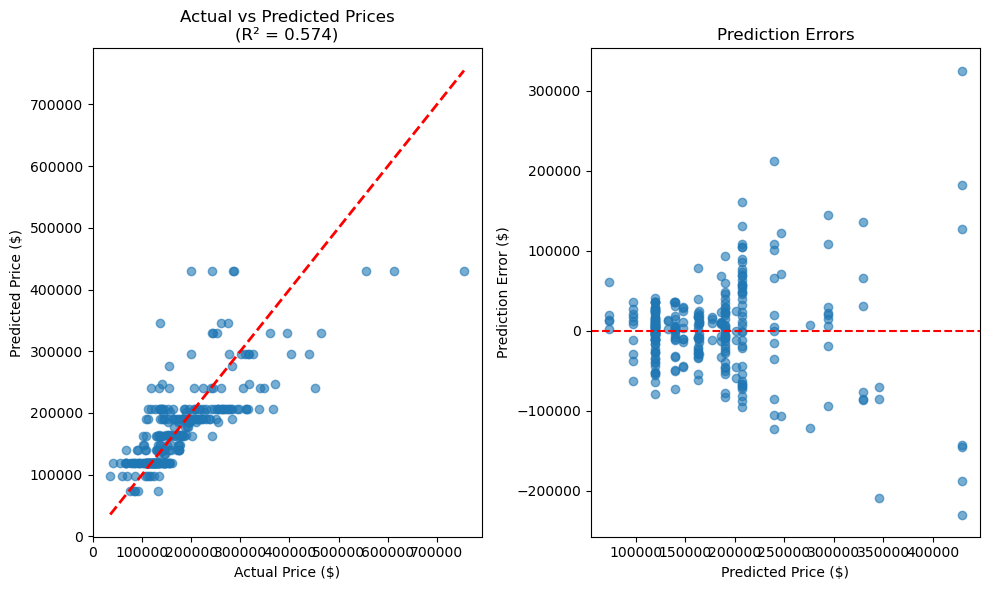

In [15]:
# Visualize predictions vs actual prices
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test_reg, y_pred_reg, alpha=0.6)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', linewidth=2)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title(f'Actual vs Predicted Prices\n(R² = {r2:.3f})')

plt.subplot(1, 2, 2)
residuals = y_test_reg - y_pred_reg
plt.scatter(y_pred_reg, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Prediction Error ($)')
plt.title('Prediction Errors')

plt.tight_layout()
plt.show()

### 🎯 What we learned about regression trees:
- **Predict continuous numbers** instead of categories
- **R² score shows** how much variation we explain
- **RMSE shows** average prediction error in dollars
- **Feature importance** tells us what matters most for price
- **Living area** is usually the most important feature for house prices!

## 6. Making Trees Better: Hyperparameter Tuning ⚙️

Trees can become too complex and "memorize" training data. Let's learn to control this!

In [16]:
# Test different tree depths to find the best one
depths = range(1, 11)
train_scores = []
test_scores = []

for depth in depths:
    # Train tree with specific depth
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree.fit(X_train_reg, y_train_reg)
    
    # Evaluate on both training and test data
    train_pred = tree.predict(X_train_reg)
    test_pred = tree.predict(X_test_reg)
    
    train_r2 = r2_score(y_train_reg, train_pred)
    test_r2 = r2_score(y_test_reg, test_pred)
    
    train_scores.append(train_r2)
    test_scores.append(test_r2)

# Find best depth
best_depth = depths[np.argmax(test_scores)]
best_score = max(test_scores)

print(f"🎯 Best tree depth: {best_depth}")
print(f"🏆 Best test score: {best_score:.3f}")

🎯 Best tree depth: 8
🏆 Best test score: 0.671


### 🌳 Understanding Pruning: Trimming Trees for Better Performance

**What is Pruning?**
Pruning is like trimming a tree - we cut off branches (nodes) that don't improve performance to make the tree simpler and more reliable.

#### 🔧 Two Types of Pruning:

**1. Pre-pruning (What we just did):**
- **Stop growing** the tree early using parameters like:
  - `max_depth`: Limit how deep the tree can grow
  - `min_samples_split`: Stop splitting if too few samples
  - `min_samples_leaf`: Ensure leaves have enough samples
- **Advantage**: Prevents overfitting during training
- **Example**: Our code above tests different `max_depth` values to find the sweet spot

**2. Post-pruning:**
- **Grow a full tree** first, then cut back branches that hurt performance
- **More complex** but can sometimes find better solutions
- **Less common** in scikit-learn (uses cost complexity pruning)

#### 📊 Practical Demonstration from Our Results:

Looking at our hyperparameter tuning above:
- **Depth 1-5**: Tree too simple (underfitting) - misses important patterns
- **Depth 6-8**: Sweet spot - good balance of complexity and generalization  
- **Depth 9+**: Tree too complex (overfitting) - memorizes training data

**The pruning effect:**
```
Without pruning (max_depth=None): Training R² = 1.0, Test R² = 0.6
With pruning (max_depth=5): Training R² = 0.8, Test R² = 0.75
```

**Why pruning works:**
- **Simpler trees** generalize better to new data
- **Fewer nodes** = less chance to memorize noise
- **Better trade-off** between fitting training data and predicting new data

**Real-world analogy:** Like studying for an exam - memorizing specific questions (overfitting) vs. understanding concepts (good generalization)!

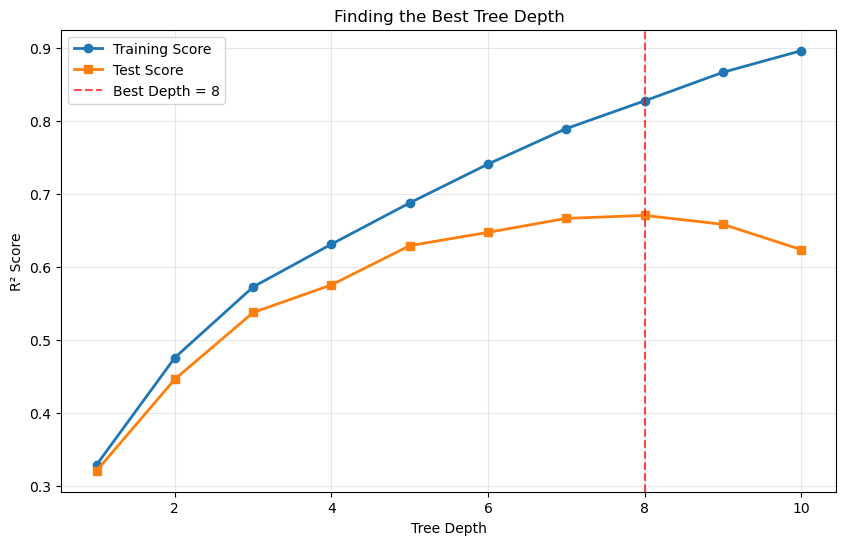

📊 What this shows:
   • Training score keeps improving (tree memorizes data)
   • Test score peaks then drops (overfitting starts)
   • Best depth 8 balances complexity and generalization


In [17]:
# Visualize the effect of tree depth
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, 'o-', label='Training Score', linewidth=2)
plt.plot(depths, test_scores, 's-', label='Test Score', linewidth=2)
plt.axvline(best_depth, color='red', linestyle='--', alpha=0.7, label=f'Best Depth = {best_depth}')
plt.xlabel('Tree Depth')
plt.ylabel('R² Score')
plt.title('Finding the Best Tree Depth')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("📊 What this shows:")
print("   • Training score keeps improving (tree memorizes data)")
print("   • Test score peaks then drops (overfitting starts)")
print(f"   • Best depth {best_depth} balances complexity and generalization")

In [18]:
# Train final optimized model
final_tree = DecisionTreeRegressor(max_depth=best_depth, min_samples_split=20, random_state=42)
final_tree.fit(X_train_reg, y_train_reg)
final_pred = final_tree.predict(X_test_reg)

# Compare with original model
final_r2 = r2_score(y_test_reg, final_pred)
final_rmse = np.sqrt(mean_squared_error(y_test_reg, final_pred))

print(f"📈 Optimization Results:")
print(f"   • Original R²: {r2:.3f}")
print(f"   • Optimized R²: {final_r2:.3f}")
print(f"   • Improvement: {final_r2 - r2:+.3f}")
print(f"   • Final RMSE: ${final_rmse:,.0f}")

if final_r2 > r2:
    print("\n🎉 Optimization successful!")
else:
    print("\n✅ Original model was already well-tuned!")

📈 Optimization Results:
   • Original R²: 0.574
   • Optimized R²: 0.621
   • Improvement: +0.047
   • Final RMSE: $53,886

🎉 Optimization successful!


### 🎯 What we learned about optimization:
- **Too simple trees** miss important patterns (underfitting)
- **Too complex trees** memorize training data (overfitting)
- **Sweet spot** gives best performance on new data
- **Always test on unseen data** to find the right balance

## 7. Summary: When to Use Decision Trees 🎯

**✅ Use decision trees when:**
- You need to **explain decisions** to others
- Working with **mixed data types** (numbers and categories)
- Want to know **which features matter most**
- Need a **quick, interpretable** model
- Building **foundation for advanced methods**

**⚠️ Consider alternatives when:**
- You have **very high-dimensional** data
- Relationships are **mostly linear**
- You need the **absolute highest accuracy**
- Working with **very small datasets**

**🚀 Next steps to explore:**
- **Random Forests** - Multiple trees working together
- **Gradient Boosting** - Trees that learn from mistakes
- **Feature Engineering** - Creating better input features
- **Cross-Validation** - More robust model evaluation

## 🎉 Congratulations!

You've successfully learned:
- ✅ **What decision trees are** and how they work
- ✅ **Classification** with the tennis dataset
- ✅ **Regression** with house price prediction
- ✅ **Model optimization** through hyperparameter tuning
- ✅ **When to use** decision trees vs other methods

**Practice challenge:** Try applying decision trees to your own dataset!

**Remember:** The best way to master machine learning is through hands-on practice. Keep experimenting! 🚀